In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('ticks')
np.random.seed(123)

In [2]:
def gillespie_SIR(x,n,N,beta,gamma, mu):
    S_list = []
    I_list = []
    R_list = []
    t_list = []
    t_list.append(0)
    S_list.append(x[0])
    I_list.append(x[1])
    R_list.append(x[2])
    for i in range(n):
        if(I_list[-1] == 0):
            break
        S = S_list[-1]
        I = I_list[-1]
        R = R_list[-1]
        r1 = beta*S*I/N # infection
        r2 = gamma*I # recovery
        r3 = mu*I # death of infected
        r4 = mu*R # death of recovered
        rtotal = r1 + r2 + r3 + r4 # total rate
        rand1 = np.random.random()
        rand2 = np.random.random()
        # searching for dt time of next reaction
        dt = (1/rtotal)*np.log(1/rand1)
        t_list.append(t_list[-1] + dt)
        # select which reaction ocurs
        react1 = r1/rtotal
        react2 = r2/rtotal
        react3 = r3/rtotal
        react4 = r4/rtotal
        if(rand2 < react1):
            # someone gets infected
            S_next = S - 1
            I_next = I + 1
            R_next = R
        elif(rand2 < react1 + react2 and rand2 >= react1):
            # someone gets recovered
            S_next = S
            I_next = I - 1
            R_next = R + 1
        elif(rand2 < react1 + react2 + react3 and rand2 >= react1 + react2):
            S_next = S + 1
            I_next = I - 1
            R_next = R
        else:
            S_next = S + 1
            R_next = R - 1
            I_next = I
        S_list.append(S_next)
        I_list.append(I_next)
        R_list.append(R_next)
    return t_list, S_list,I_list,R_list

## Outbreak probability in different situations of $\epsilon$ and $i_0$

### Changing the initial infected number

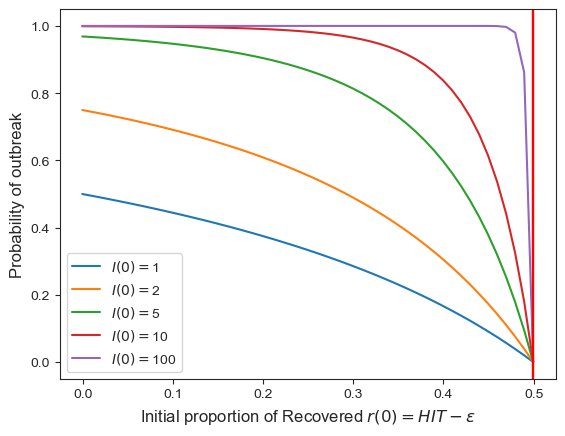

In [3]:
def prob_outbreak(r,I0,beta,gamma,mu):
    R0 = beta/(gamma + mu)
    prob_extinction = ((1/R0)*(1/(1 - (r))))**(I0)
    prob_outbreak = 1 - prob_extinction
    return prob_outbreak

for I0 in np.array([1,2,5,10,100]):
    beta = 2
    gamma = 1
    N = 100000
    mu = 0.001
    R0 = beta/(gamma+mu)
    r = 1 - (1/R0) - np.arange(0.0,1/R0,0.01)
    plt.plot(r,prob_outbreak(r,I0,beta,gamma,mu), label = r'$I(0) =$' + str(I0))
    #plt.plot(np.arange(1/R0,1,0.01),np.zeros(shape = len(np.arange(1/R0,1,0.01))), 'b', label = I0/N)
    plt.axvline(1 - (1/R0), color = 'red')
plt.xlabel(r'Initial proportion of Recovered $r(0) = HIT - \epsilon$', fontsize = 12)
plt.ylabel('Probability of outbreak', fontsize = 12)
plt.legend()

### Changing the $R_0$ number

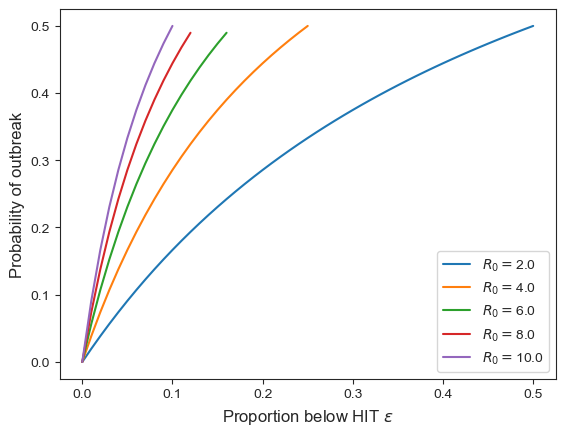

In [4]:
for beta in np.array([2,4,6,8,10]):
    gamma = 1
    N = 100000
    mu = 0.001
    R0 = beta/(gamma+mu)
    I0 = 1
    r = 1 - (1/R0) - np.arange(0.0,1/R0,0.01)
    plt.plot(np.arange(0.0,1/R0,0.01),prob_outbreak(r,I0,beta,gamma,mu), label = r'$R_0 =$' + str(beta/(gamma)))
    #plt.plot(np.arange(1/R0,1,0.01),np.zeros(shape = len(np.arange(1/R0,1,0.01))), 'b', label = I0/N)
    #plt.axvline(1 - (1/R0), color = 'red')
    plt.xlabel(r'Proportion below HIT $\epsilon$', fontsize = 12)
    plt.ylabel('Probability of outbreak', fontsize = 12)
    plt.legend()

## Outbreak size

10000.0


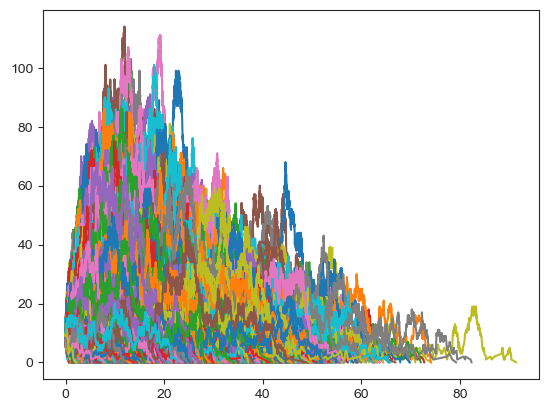

50000.0


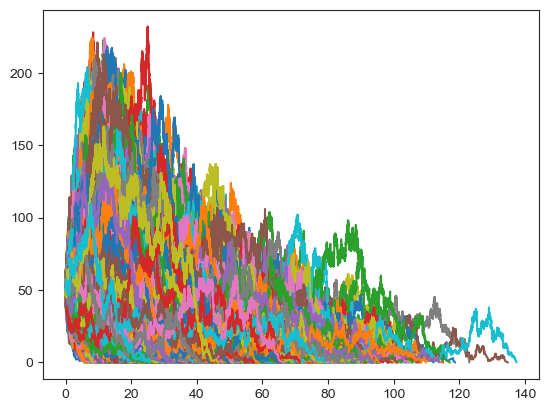

100000.0


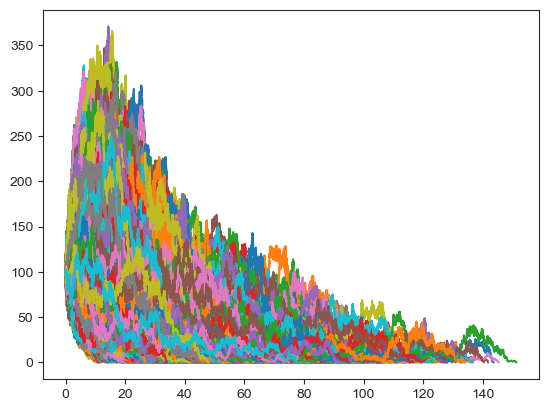

500000.0


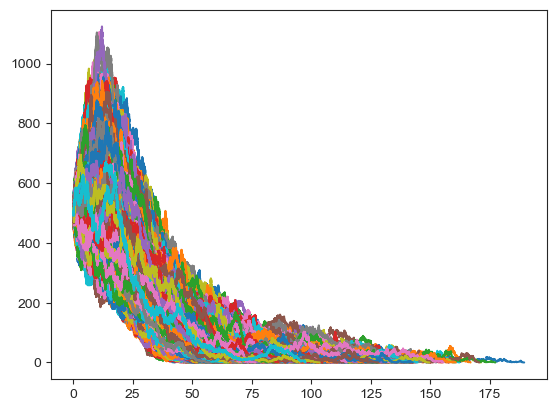

1000000.0


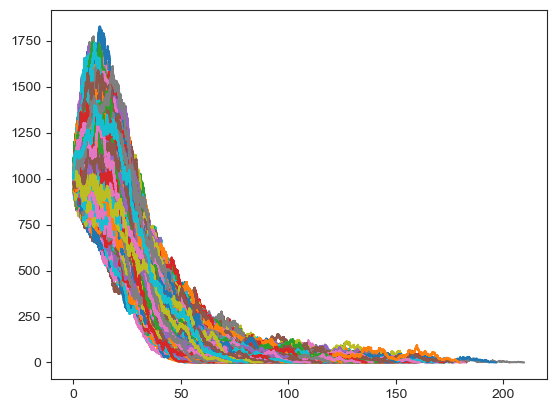

In [5]:
beta = 3
N_vec = [10000,50000,100000,500000,1000000]
n = 100000
gamma = 1
mu = 0
list_N = []
list_t = []
eps = 0.01

for N in N_vec:
    i0 = 0.001
    r0 = 1 - (1/(beta/gamma)) - eps
    x = N*np.array([1 - i0 - (r0-i0), i0, r0 - i0])
    print(x.sum())
    R0 = beta/gamma
    list_i = []
    list_t_i = []
    for i in range(10000):
        t, S, I, R = gillespie_SIR(x,n,N,beta,gamma, mu)
        infected = R[-1] - r0*N 
        list_i.append(infected)
        list_t_i.append(t[-1])
        plt.plot(t,I)
    plt.show()
    list_N.append(list_i)
    list_t.append(list_t_i)

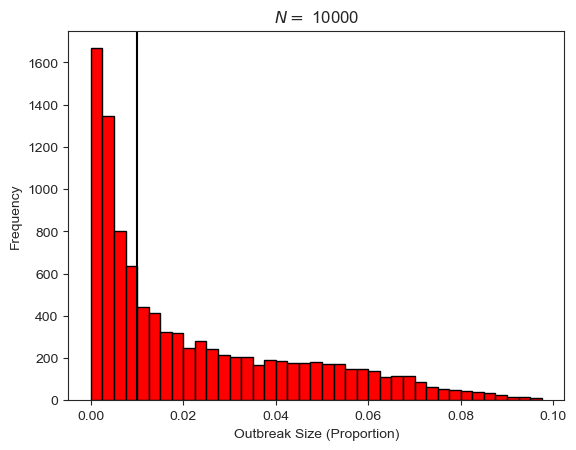

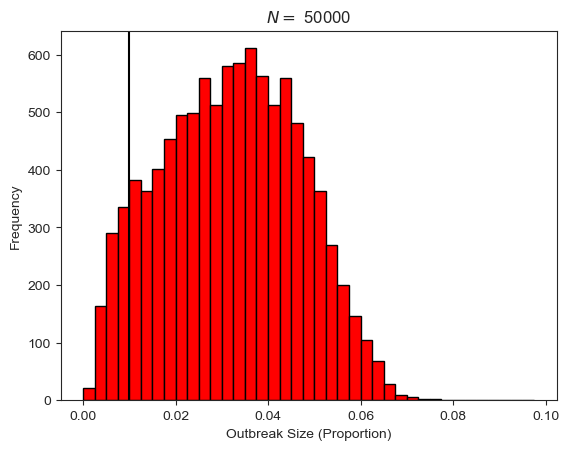

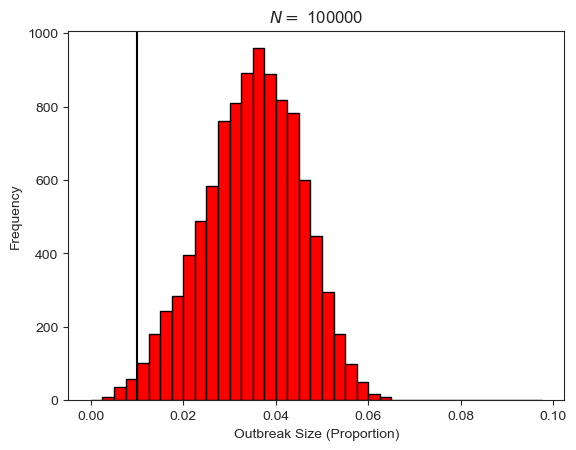

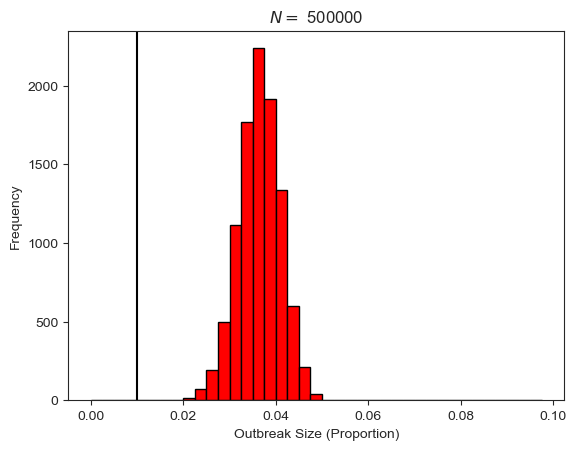

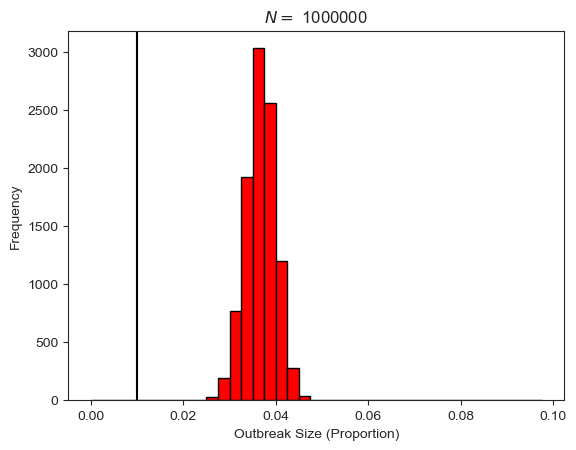

In [6]:
for i in range(len(N_vec)):
    plt.title(r'$N =$ '+str(N_vec[i]))
    bins_vec = np.arange(0,0.1,0.0025)
    plt.hist(np.array(list_N[i])/N_vec[i], bins = bins_vec, edgecolor = 'black', color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Proportion)')
    plt.axvline(0.01, color = 'k')
    plt.show()

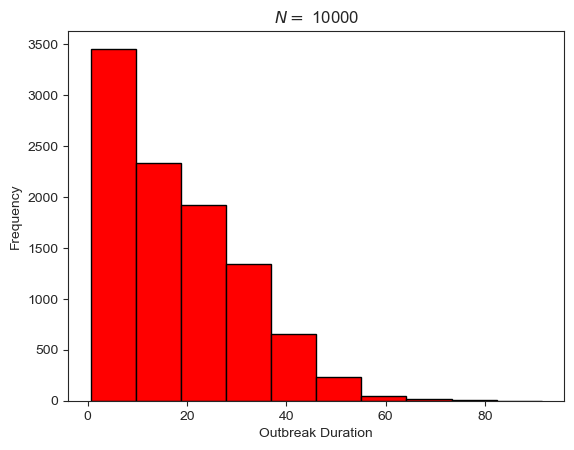

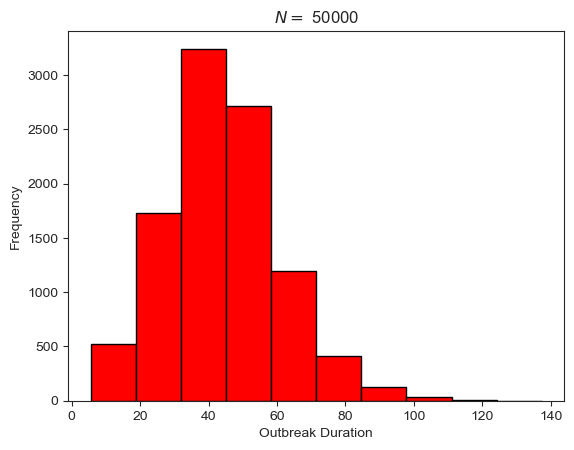

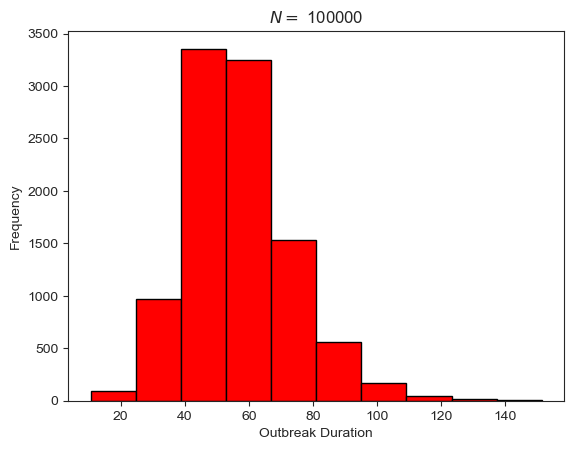

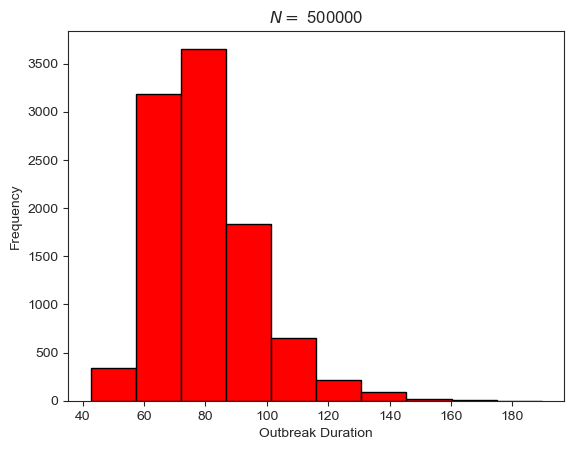

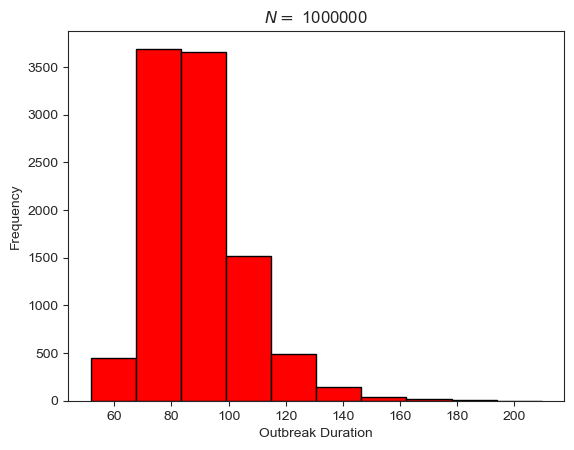

In [8]:
for i in range(len(list_t)):
    plt.title(r'$N =$ '+str(N_vec[i]))
    #bins_vec = np.arange(0,0.1,0.0025)
    #plt.hist(np.array(list_N[i])/N_vec[i], bins = bins_vec, edgecolor = 'black', color = 'red')
    plt.hist(np.array(list_t[i]), edgecolor = 'black', color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Duration')
    #plt.axvline(0.01, color = 'k')
    plt.show()

## Outbreak size II

10000.0


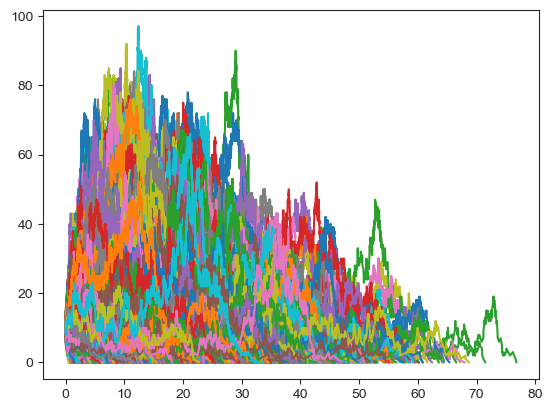

50000.0


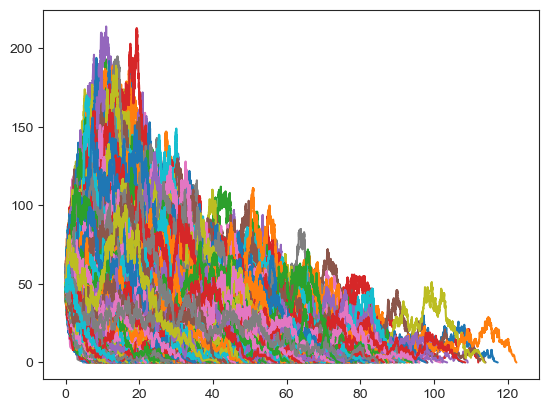

100000.0


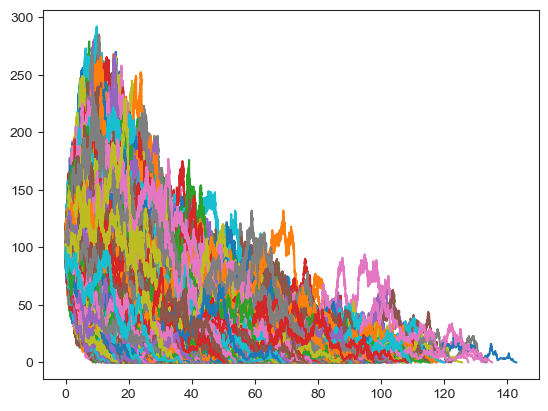

500000.0


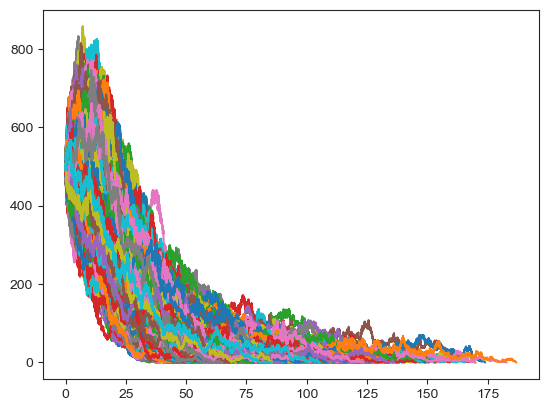

1000000.0


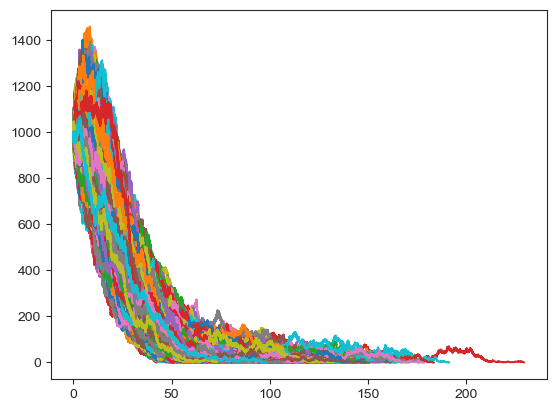

In [4]:
beta = 3
N_vec = [10000,50000,100000,500000,1000000]
n = 100000
gamma = 1
mu = 0
list_N = []
list_t = []
eps = 0.001

for N in N_vec:
    i0 = 0.001
    r0 = 1 - (1/(beta/gamma)) - eps
    x = N*np.array([1 - i0 - (r0-i0), i0, r0 - i0])
    print(x.sum())
    R0 = beta/gamma
    list_i = []
    list_t_i = []
    for i in range(10000):
        t, S, I, R = gillespie_SIR(x,n,N,beta,gamma, mu)
        infected = R[-1] - r0*N 
        list_i.append(infected)
        list_t_i.append(t[-1])
        plt.plot(t,I)
    plt.show()
    list_N.append(list_i)
    list_t.append(list_t_i)

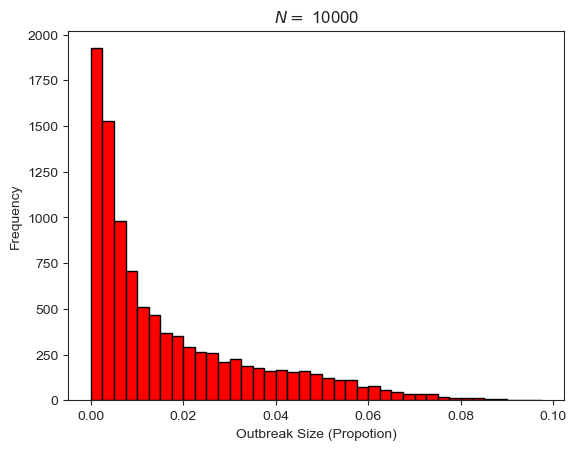

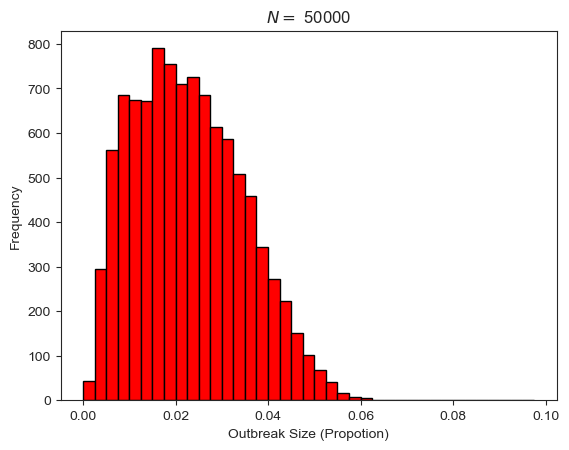

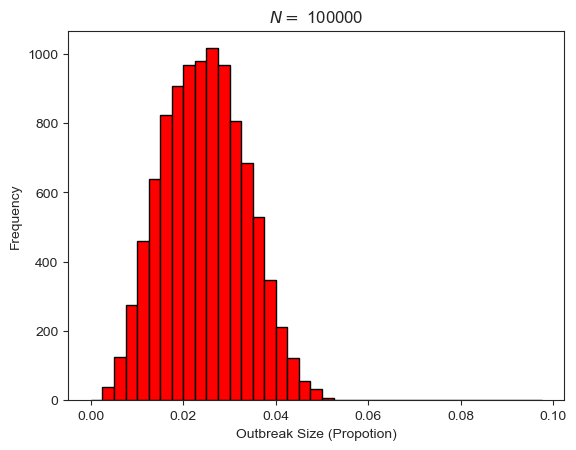

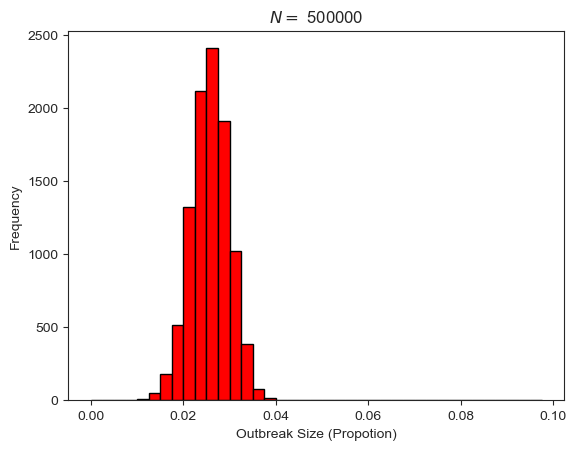

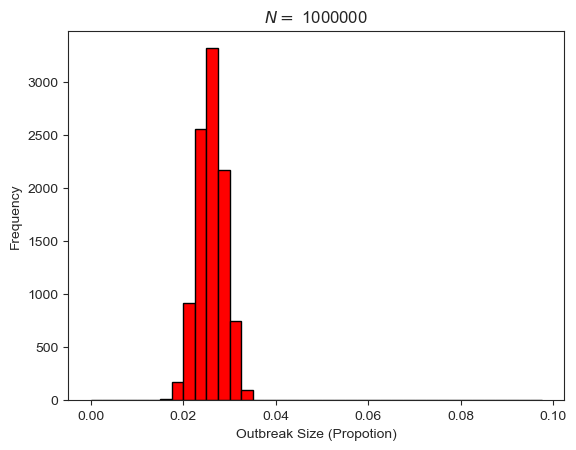

In [5]:
for i in range(len(N_vec)):
    plt.title(r'$N =$ '+str(N_vec[i]))
    bins_vec = np.arange(0,0.1,0.0025)
    plt.hist(np.array(list_N[i])/N_vec[i], bins = bins_vec, edgecolor = 'black', color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Propotion)')
    plt.show()

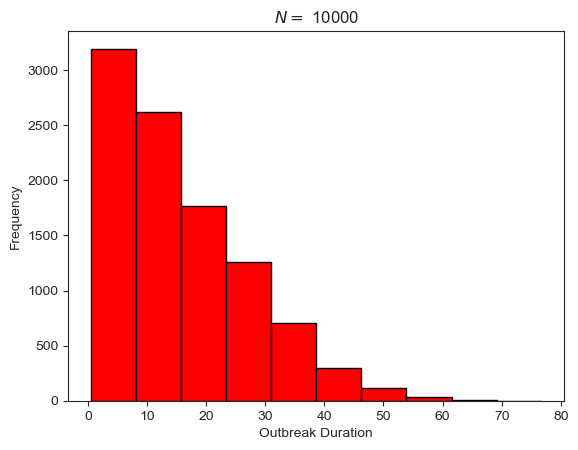

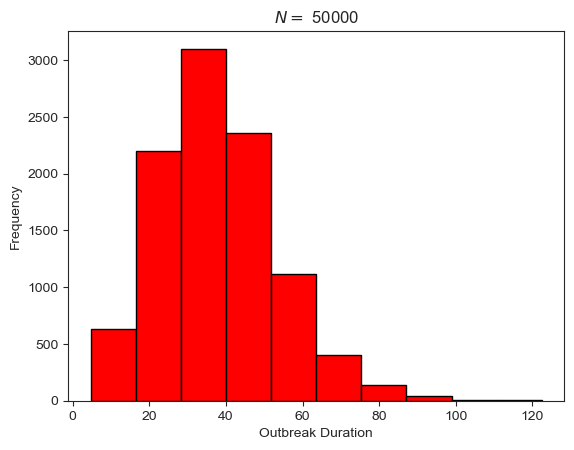

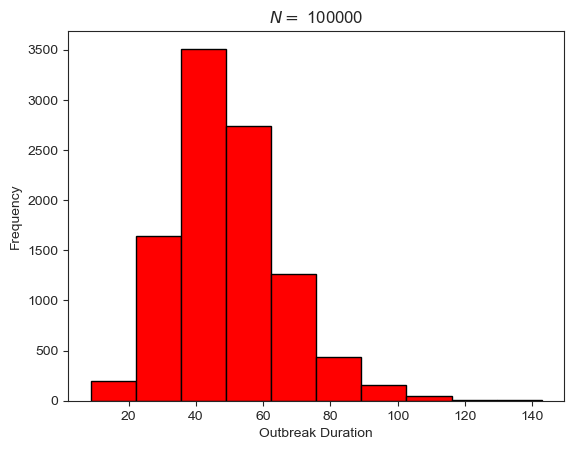

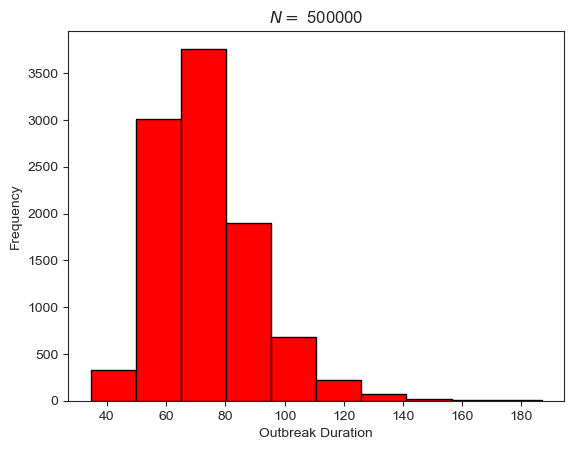

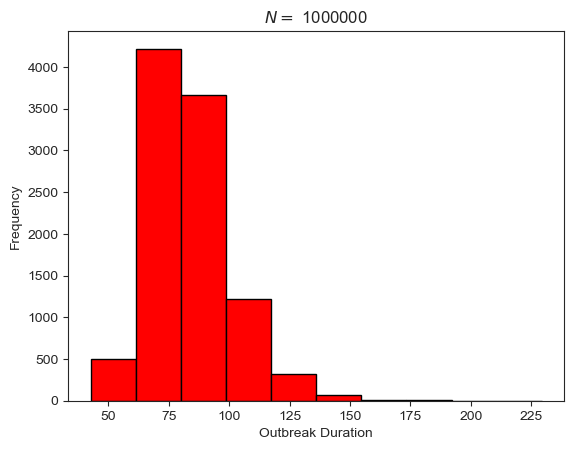

In [6]:
for i in range(len(list_t)):
    plt.title(r'$N =$ '+str(N_vec[i]))
    #bins_vec = np.arange(0,0.1,0.0025)
    #plt.hist(np.array(list_N[i])/N_vec[i], bins = bins_vec, edgecolor = 'black', color = 'red')
    plt.hist(np.array(list_t[i]), edgecolor = 'black', color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Duration')
    plt.show()